In [9]:
import serial
import serial.tools.list_ports
import pandas as pd
import numpy as np

# Connect to the Nicla
ports = serial.tools.list_ports.comports()
for n in ports:
    # Print the names of the devices connected to the computer - your Nicla will be one of them.
    print(n.description)
    print(n.device)
    # If your computer is a Mac, you can use the following lines to automatically set the Serial port:
    if 'Nicla' in n.description:
         dev = n.device

# You need to change the line below to the right Serial port for your Nicla:
#dev = 'dev/cu.usbmodemAE4E41EF2'

# See baudrate=115200 below? This is the speed at which the Nicla communicates with the computer. Don't change it.
nicla = serial.Serial(port=dev, baudrate=115200, timeout=.1)

n/a
/dev/cu.Bluetooth-Incoming-Port
Nicla Sense CMSIS-DAP
/dev/cu.usbmodemAE4E41EF2


In [10]:
# Number of readings to take
n_readings = 1000
column_titles = ['time', 'temp', 'pressure', 'gas']

# Clear the buffer for the Nicla serial port - it may help to comment these 2 lines out, it may help to keep them!
#nicla.flush()
#nicla.reset_input_buffer()

# Start collecting data - tell the Nicla how many data points to take
nicla.write(bytes("{f0}".format(f0=n_readings), 'utf-8'))

# Create somewhere to store the data
data_table = np.zeros((n_readings, len(column_titles)))
# Uncomment the line below if you'd like to see what the data_table looks like - google "numpy zeros" to learn what the function is doing.
# print(data_table)

# Get the data from the Nicla
for n in range(n_readings):
    # Read data from the Nicla up to '/n'
    data = nicla.readline()
    # Split the line read from the Nicla every time it finds a ','
    data = np.fromstring(data, sep=',')
    # Unless the data has the correct length, ignore it
    if len(data) == len(column_titles):
        data_table[n,:] = data

# Close the serial port
nicla.close()

# Put the data in a DataFrame
tpg_data = pd.DataFrame(data_table, columns=column_titles)
tpg_data

,time,temp,pressure,gas
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
995,3277.0,30.6,1011.0,15195.0
996,3280.0,30.6,1011.0,15195.0
997,3284.0,30.6,1011.0,15195.0
998,3287.0,30.6,1011.0,15195.0


In [11]:
tpg_data

,time,temp,pressure,gas
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
995,3277.0,30.6,1011.0,15195.0
996,3280.0,30.6,1011.0,15195.0
997,3284.0,30.6,1011.0,15195.0
998,3287.0,30.6,1011.0,15195.0


In [12]:
tpg_data['temp']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
995    30.6
996    30.6
997    30.6
998    30.6
999    30.6
Name: temp, Length: 1000, dtype: float64

In [13]:
data_filtered = tpg_data[['time', 'temp']]
data_filtered

,time,temp
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,3277.0,30.6
996,3280.0,30.6
997,3284.0,30.6
998,3287.0,30.6


In [18]:
tpg_data[tpg_data['temp'] > 0]

,time,temp,pressure,gas
9,1.0,31.45,1011.00,16736.0
10,78.0,30.57,1011.03,15143.0
11,80.0,30.57,1011.03,15143.0
12,83.0,30.57,1011.03,15143.0
13,86.0,30.57,1011.03,15143.0
...,...,...,...,...
995,3277.0,30.60,1011.00,15195.0
996,3280.0,30.60,1011.00,15195.0
997,3284.0,30.60,1011.00,15195.0
998,3287.0,30.60,1011.00,15195.0


In [19]:
data_exercise1 = tpg_data
data_exercise1

,time,temp,pressure,gas
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
995,3277.0,30.6,1011.0,15195.0
996,3280.0,30.6,1011.0,15195.0
997,3284.0,30.6,1011.0,15195.0
998,3287.0,30.6,1011.0,15195.0


In [21]:
# this will return rows that have an index with a value between 0 and 20 - again, Python starts at 0, but keeps you on your toes by including the last number you're requesting.
data_exercise1.loc[0:20]

,time,temp,pressure,gas
0,0.0,0.00,0.00,0.0
1,0.0,0.00,0.00,0.0
2,0.0,0.00,0.00,0.0
3,0.0,0.00,0.00,0.0
4,0.0,0.00,0.00,0.0
5,0.0,0.00,0.00,0.0
6,0.0,0.00,0.00,0.0
7,0.0,0.00,0.00,0.0
8,0.0,0.00,0.00,0.0
9,1.0,31.45,1011.00,16736.0


In [23]:
#exercise 
data_exercise2 = tpg_data[tpg_data['temp']>0]
data_exercise2

,time,temp,pressure,gas
9,1.0,31.45,1011.00,16736.0
10,78.0,30.57,1011.03,15143.0
11,80.0,30.57,1011.03,15143.0
12,83.0,30.57,1011.03,15143.0
13,86.0,30.57,1011.03,15143.0
...,...,...,...,...
995,3277.0,30.60,1011.00,15195.0
996,3280.0,30.60,1011.00,15195.0
997,3284.0,30.60,1011.00,15195.0
998,3287.0,30.60,1011.00,15195.0


In [25]:
#Write python that returns the first five rows of data_exercise2 using both loc and iloc.
#using .iloc
data_exercise2.iloc[0:5]

,time,temp,pressure,gas
9,1.0,31.45,1011.00,16736.0
10,78.0,30.57,1011.03,15143.0
11,80.0,30.57,1011.03,15143.0
12,83.0,30.57,1011.03,15143.0
13,86.0,30.57,1011.03,15143.0


In [26]:
#using .loc
data_exercise2.loc[9:13]

,time,temp,pressure,gas
9,1.0,31.45,1011.00,16736.0
10,78.0,30.57,1011.03,15143.0
11,80.0,30.57,1011.03,15143.0
12,83.0,30.57,1011.03,15143.0
13,86.0,30.57,1011.03,15143.0


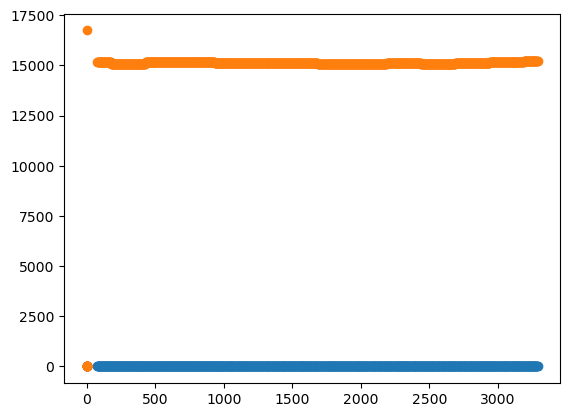

In [27]:
import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False    # Remove annoying auto-offset
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()
# Add an axis to the figure
ax = fig.add_subplot(111)
# Tell the axis to plot the data - time on the x-axis, temperature on the y-axis
ax.scatter(tpg_data['time'], tpg_data['temp'])
# Tell the axis to plot the data - time on the x-axis, gas reading on the y-axis
ax.scatter(tpg_data['time'], tpg_data['gas'])
# Show the figure - not strictly necessary in jupyter notebook, but essential if you're writing a .py file
plt.show()

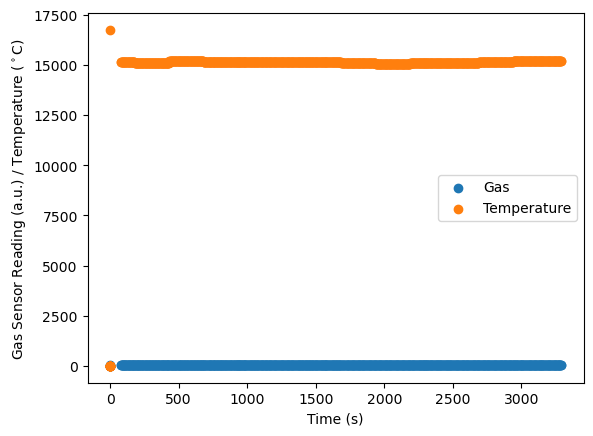

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'])
ax.scatter(tpg_data['time'], tpg_data['gas'])

#Add some labels and a legend to the plot
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Gas Sensor Reading (a.u.) / Temperature ($^\circ$C)')
plt.legend(['Gas', 'Temperature'])
plt.show()
                                                         

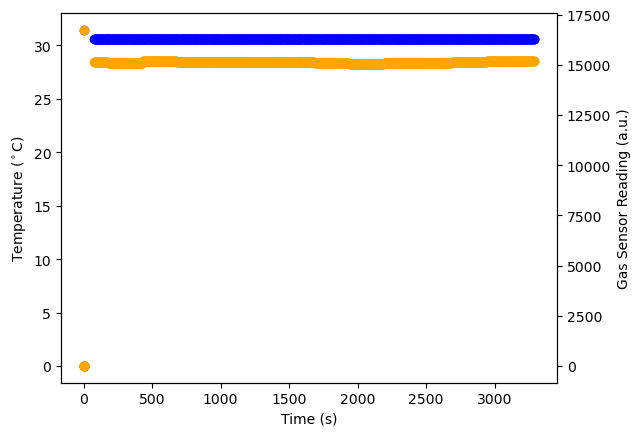

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue')
ax.set_ylabel(r'Temperature ($^\circ$C)')

# Add a second y-axis to the plot              
ax2 = ax.twinx()
# Plot a second data set on the second y-axis
ax2.scatter(tpg_data['time'], tpg_data['gas'], color='orange')
ax2.set_ylabel('Gas Sensor Reading (a.u.)')

ax.set_xlabel('Time (s)')
plt.show()

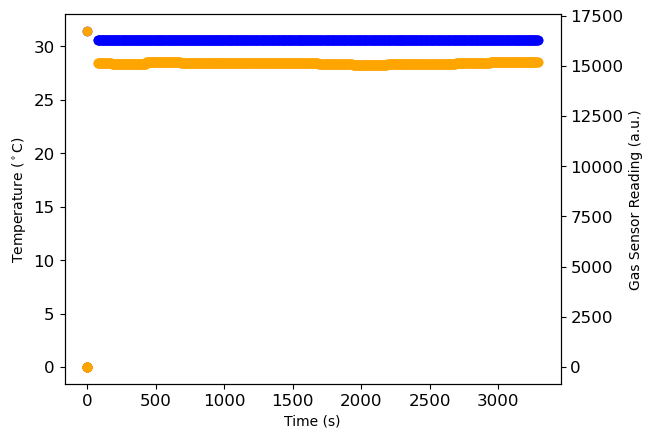

In [36]:
#Python Exercise 2 Change the font size of the tick labels on my plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue')
ax.set_ylabel(r'Temperature ($^\circ$C)')

#Line that change font size of tick labels for the first y-axis and x-axis
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

# Add a second y-axis to the plot              
ax2 = ax.twinx()
# Plot a second data set on the second y-axis
ax2.scatter(tpg_data['time'], tpg_data['gas'], color='orange')
ax2.set_ylabel('Gas Sensor Reading (a.u.)')

#Line that change the font size of tick labels for the second y-axis
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax.set_xlabel('Time (s)')
plt.show()

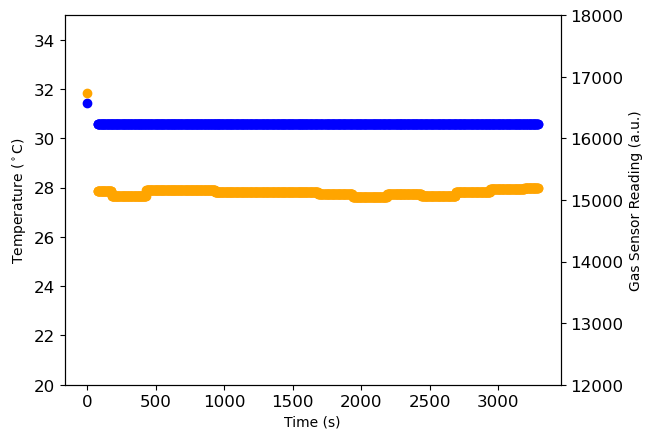

In [37]:
#Python Exercise Change the values of the x- and y-limits so you can clearly read both datasets
#Python Exercise 2 Change the font size of the tick labels on my plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue')
ax.set_ylabel(r'Temperature ($^\circ$C)')

#Line that change font size of tick labels for the first y-axis and x-axis
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

# Set x-axis and y-axis limits for the first y-axis (temperature)

# (we will not change any limit to x axis as they are speard accross the graph )ax.set_xlim([min_value_x, max_value_x])

ax.set_ylim([20, 35])

# Add a second y-axis to the plot              
ax2 = ax.twinx()
# Plot a second data set on the second y-axis
ax2.scatter(tpg_data['time'], tpg_data['gas'], color='orange')
ax2.set_ylabel('Gas Sensor Reading (a.u.)')

#Line that change the font size of tick labels for the second y-axis
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)

#Set Y-axis limits for the second y-axis limits (gas)
ax2.set_ylim([12000, 18000])
ax.set_xlabel('Time (s)')
plt.show()

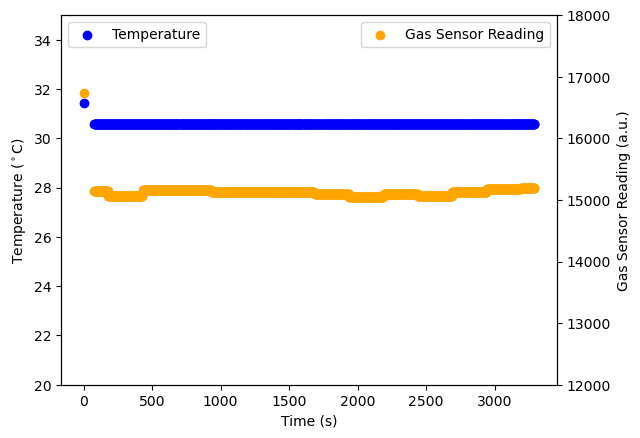

In [40]:
#Python Exercise, Creating Legend 
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the first data set (temperature) and add label for the legend
scatter1 = ax.scatter(tpg_data['time'], tpg_data['temp'], color='blue', label='Temperature')
ax.set_ylabel(r'Temperature ($^\circ$C)')
ax.set_ylim([20, 35])  # Adjusted y-axis limits for temperature

# Add a second y-axis to the plot
ax2 = ax.twinx()

# Plot the second data set (gas sensor reading) and add label for the legend
scatter2 = ax2.scatter(tpg_data['time'], tpg_data['gas'], color='orange', label='Gas Sensor Reading')
ax2.set_ylabel('Gas Sensor Reading (a.u.)')
ax2.set_ylim([12000, 18000])  # Adjusted y-axis limits for gas sensor readings

# Set the x-axis label
ax.set_xlabel('Time (s)')

# Create a legend for both datasets
ax.legend(handles=[scatter1], loc='upper left', fontsize=10)   # Legend for the temperature dataset
ax2.legend(handles=[scatter2], loc='upper right', fontsize=10) # Legend for the gas sensor dataset

# Show the plot
plt.show()

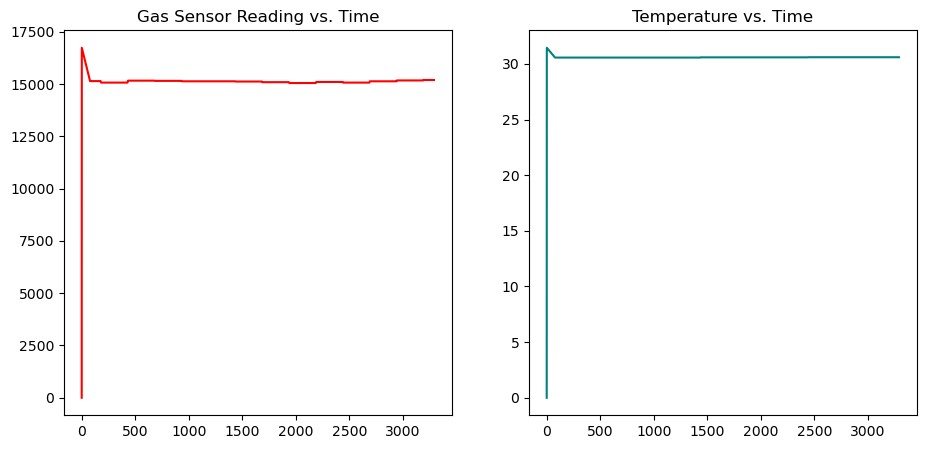

In [41]:
fig = plt.figure(figsize=(11,5))
# Create a subplot with 1 row and 2 columns - ax1 is in position 1
ax1 = fig.add_subplot(121)
# Create a subplot with 1 row and 2 columns - ax2 is in position 2
ax2 = fig.add_subplot(122)

# c=colour, it's used in the format c=(red, green, blue) where each value is between 0 and 1
ax1.plot(tpg_data['time'], tpg_data['gas'], c=(1.0, 0.0, 0.0))
ax1.set_title('Gas Sensor Reading vs. Time')

ax2.plot(tpg_data['time'], tpg_data['temp'], c=(0.0, 0.5, 0.5))
ax2.set_title('Temperature vs. Time')

plt.show()

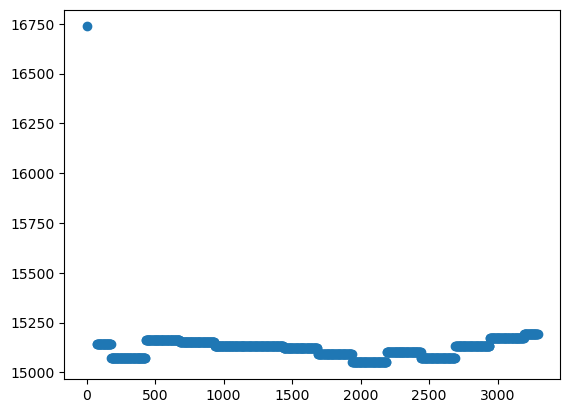

In [43]:
#Data Filtering Using Pandas 1 - Filtering by Value
tpg_data_filter = tpg_data[tpg_data['gas'] > 0]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpg_data_filter['time'], tpg_data_filter['gas'])
plt.show()

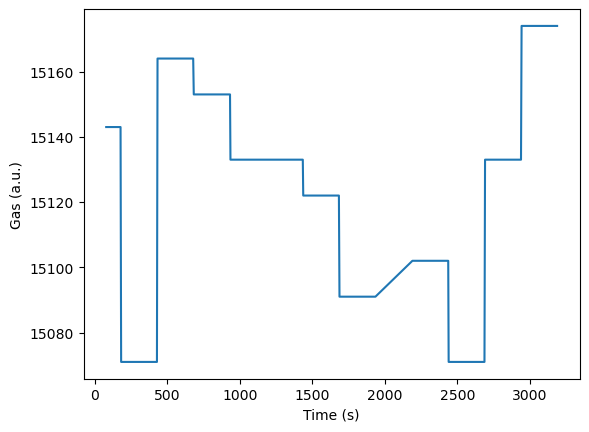

In [44]:
lower_bound = tpg_data['gas'].quantile(0.01)
upper_bound = tpg_data['gas'].quantile(0.99)

# Here's the tricky bit - we ignore values that are below the lower bound or above the upper bound - ask ChatGPT what the code is doing!
data_clean = tpg_data[(tpg_data['gas'] > lower_bound) & (tpg_data['gas'] < upper_bound)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data_clean['time'], data_clean['gas'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Gas (a.u.)')
plt.show()

In [45]:
# Save graph - resolution @ 200 dots per inch, tight bounding box
filename = 'plot_name.png'

# The code below will save your figure to the directory where this code is stored.
plt.savefig(filename, dpi=200, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [47]:
import os
print(os.getcwd())

/Users/tanakorntechadilok/Desktop
